<a href="https://colab.research.google.com/github/rayenlabdouni/rnn_fake_news/blob/rnn/RNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import tensorflow as tf

from bs4 import BeautifulSoup

import sys
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input,Bidirectional,LSTM
from keras.layers import Embedding
from keras.models import Model,Sequential

df = pd.read_csv("drive/My Drive/go/data2.csv",sep=",")

texts = []
classess = []


for i in range(df.text.shape[0]):
    df["title"]=df["title"].astype(str)
    df["text"]=df["text"].astype(str)
    text = df.title[i]
    text2= df.text[i]
    textt = text + " " + text2
    texts.append(textt)
    classess.append(df.label[i])

    
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(len(sequences))
df.count()

data = pad_sequences(sequences, maxlen=1000)
y = df["label"]
labels = to_categorical(y,num_classes = 2,dtype="int32")
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
print(data)

from sklearn.model_selection import train_test_split
"""
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
"""
x_train, x_test, y_train, y_test = train_test_split( data, labels, test_size=0.20)
x_test, x_val, y_test, y_val = train_test_split( data, labels, test_size=0.50)
print('Size of train, validation, test:', len(y_train), len(y_test))
print('real & fake news in train,valt,test:')
print(y_train.sum(axis=0))
print(y_test.sum(axis=0))


embeddings_index = {}
f = open('drive/My Drive/go/glove.6B.100d.txt')
for line in f:
    values = line.split()
    #print(values[1:])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
embedding_layer = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=1000)
	
sequence_input = Input(shape=(1000,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(2, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',optimizer='RMSprop',  metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),
          epochs=11, batch_size=200)	 

20203
Shape of data tensor: (20203, 1000)
Shape of label tensor: (20203, 2)
[[    0     0     0 ... 12843     5  4285]
 [    0     0     0 ... 19925  1166 13700]
 [   10     1   124 ...   670  8692  8996]
 ...
 [    0     0     0 ...  3678   774    11]
 [    0     0     0 ...    10    59  3839]
 [ 3436  6823    38 ...  1639  2304  3574]]
Size of train, validation, test: 16162 10101
real & fake news in train,valt,test:
[8307 7855]
[5248 4853]
Total 400000 word vectors in Glove.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 embedding (Embedding)       (None, 1000, 100)         24104100  
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                      

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


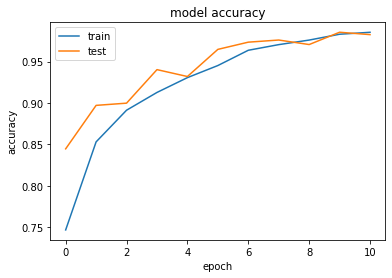

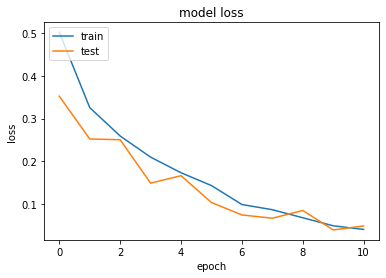

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline 
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import pickle
fie = "drive/My Drive/go/RNNdata23.sav"
his = "drive/My Drive/go/RNNdata23his.sav"
pickle.dump(model,open(fie,'wb'))
pickle.dump(history.history,open(his,'wb'))